In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)
n_samples = 100

# X: 3 features
X = np.random.normal(size=(n_samples, 3))

# Create Y as a linear combination of X + some noise
Y = np.dot(X, np.array([[0.5, -0.2],
                        [0.4,  0.1],
                        [0.3,  0.7]])) + np.random.normal(scale=0.1, size=(n_samples, 2))


In [6]:
X_c.shape, Y_c.shape

((100, 2), (100, 2))

In [2]:
# CCA: find 2 components (min(dim(X), dim(Y)) = 2)
cca = CCA(n_components=2)
X_c, Y_c = cca.fit_transform(X, Y)

# Canonical correlations
canonical_corrs = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(2)]
print("Canonical Correlations:", canonical_corrs)


Canonical Correlations: [0.9938979479632281, 0.9822520094093532]


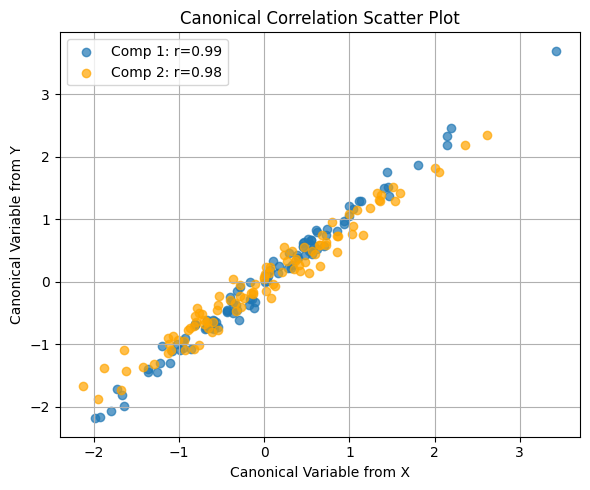

In [3]:
# Scatter plot of canonical variates
plt.figure(figsize=(6, 5))
plt.scatter(X_c[:, 0], Y_c[:, 0], label=f"Comp 1: r={canonical_corrs[0]:.2f}", alpha=0.7)
plt.scatter(X_c[:, 1], Y_c[:, 1], label=f"Comp 2: r={canonical_corrs[1]:.2f}", alpha=0.7, color='orange')
plt.xlabel("Canonical Variable from X")
plt.ylabel("Canonical Variable from Y")
plt.title("Canonical Correlation Scatter Plot")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


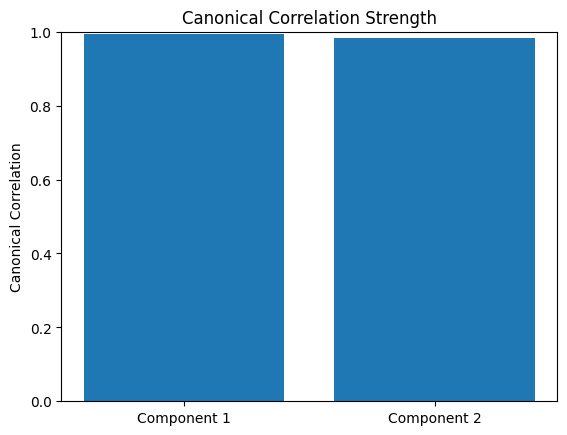

In [4]:
plt.bar([1, 2], canonical_corrs)
plt.xticks([1, 2], ["Component 1", "Component 2"])
plt.ylabel("Canonical Correlation")
plt.title("Canonical Correlation Strength")
plt.ylim(0, 1)
plt.show()


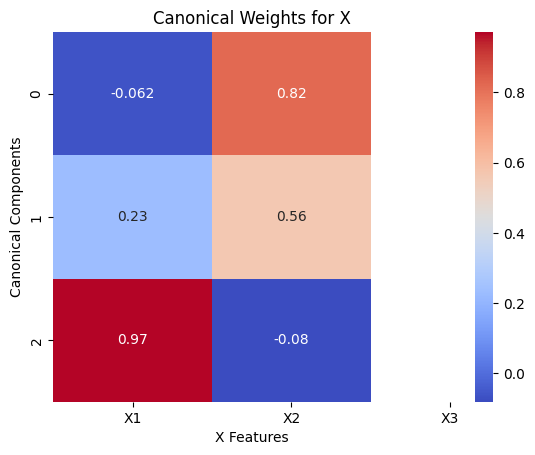

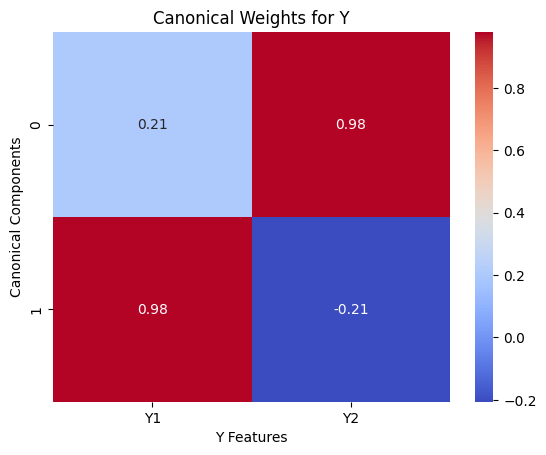

In [5]:
# Canonical weights
w_x = cca.x_weights_
w_y = cca.y_weights_

# Heatmaps for interpretation
sns.heatmap(w_x, annot=True, cmap="coolwarm", xticklabels=[f"X{i+1}" for i in range(3)])
plt.title("Canonical Weights for X")
plt.xlabel("X Features")
plt.ylabel("Canonical Components")
plt.show()

sns.heatmap(w_y, annot=True, cmap="coolwarm", xticklabels=[f"Y{i+1}" for i in range(2)])
plt.title("Canonical Weights for Y")
plt.xlabel("Y Features")
plt.ylabel("Canonical Components")
plt.show()
